# *Trump Task By Dasha Simonenko*

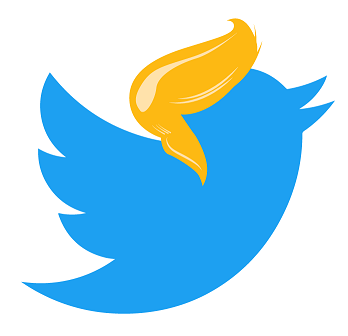

#### 1 - Loading the data

loading the relevant python libraries  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

setting two given variables 

In [2]:
DATE_ELECTED = "2016-11-08"
TWEETS_PATH = './trump_tweets.csv'

loading the CSV file

In [3]:
df = pd.read_csv(TWEETS_PATH)

making columns names marked as titles for python, and removing spaces from the names

In [4]:
df.columns=df.columns.str.title()
df.columns=df.columns.str.strip()

removing fully empty or with fully Nan values raws

In [5]:
df.dropna(how='all',axis='rows', inplace=True )

setting the type of every column to the best fitting

In [6]:
df=df.astype({'Source': 'string', 'Text': 'string','Created_At': 'datetime64[ns]','Retweet_Count':'float64','Favorite_Count': 'float64','Is_Retweet': 'bool'})

defining to python to treat every missing numeric value in a column as zero, and every missing textual value in a column as a blank string

In [7]:
df[['Retweet_Count','Favorite_Count']] = df[['Retweet_Count','Favorite_Count']].fillna(0)
df[['Is_Retweet','Text' , 'Source']] = df[['Is_Retweet' ,'Text' ,'Source' ]].fillna('')


###  2 - Which platform?

asking from python to count all the values in 'Source' column and to make a bar chart from it, setting chart features

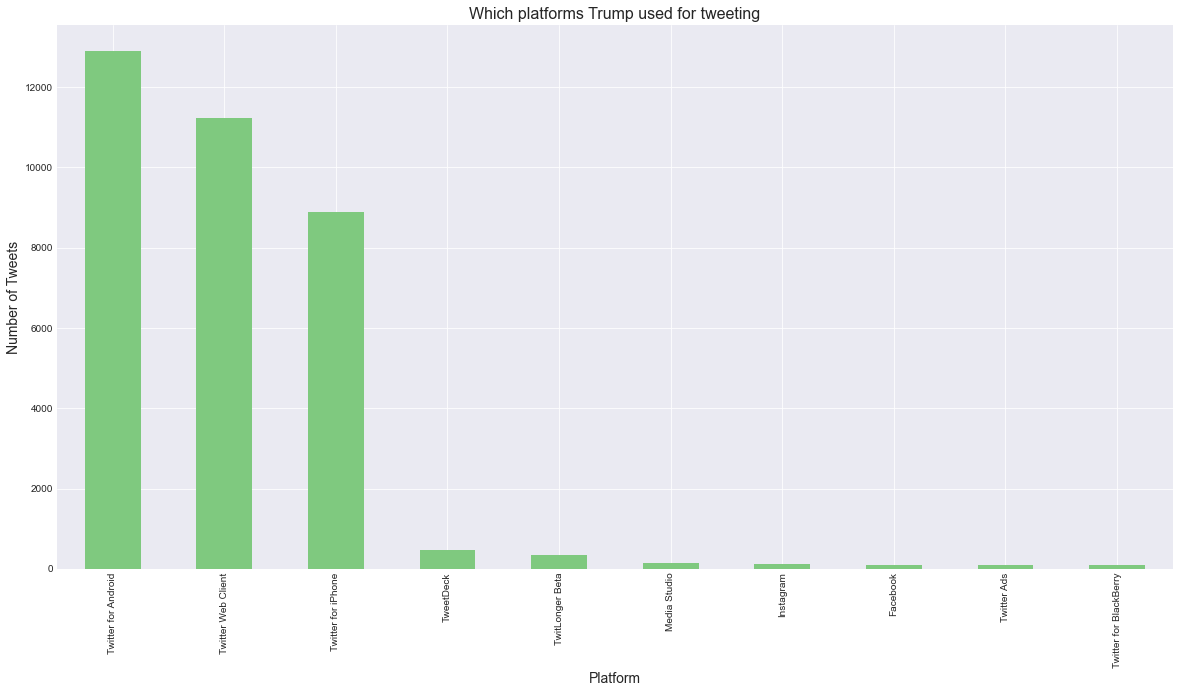

In [30]:
df['Source'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(20, 10),color='#7fc97f')
plt.xlabel("Platform", fontsize=14)
plt.ylabel("Number of Tweets", fontsize=14)
plt.title('Which platforms Trump used for tweeting',fontsize=16)
plt.style.use('seaborn-darkgrid')
plt.show()

*The chart shows that Trump used the most "Twitter for Android" for tweeting.*

### 3 - Best time to tweet

creating a function that takes every 'time' value and changes its type to int, in order to add +1 to it, and create a round hour range that this hour belongs to. using string formatting for the output

In [9]:
def hour_range(time_created):
  
    if pd.isna(time_created):
        pass
    else:
        x=int(time_created)
        return (f"{x}:00-{(x+1)}:00")
               

applying my function on the 'Created At' column, after applying dt method on it in order to get the hour number (without minutes and so), and creating a new column that will store the values that the function will return.

In [10]:
df['Hour_Range']= (df['Created_At'].dt.hour).apply(hour_range)

creating bubble sort function to sort the array by index

In [11]:
def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if int(arr[j].split(":")[0]) > int(arr[j + 1].split(":")[0]):
                arr[j], arr[j + 1] = arr[j + 1], arr[j]
    return arr

creating two masks, one that filters and shows only the dates before elections including the date Trump was elected, and other filters and shows only the dates after elections

In [12]:
mask= df['Created_At']<=DATE_ELECTED
mask1=df['Created_At']>DATE_ELECTED

taking the unique hour range values and applying the bubble sort on it.
grouping the values by 'Hour Range', and counting the mean values of 'Retweet_Count', 'Favorite_Count' for them, using reindex to use the sorted values.
creating bar charts for before and after elections, setting chart features.

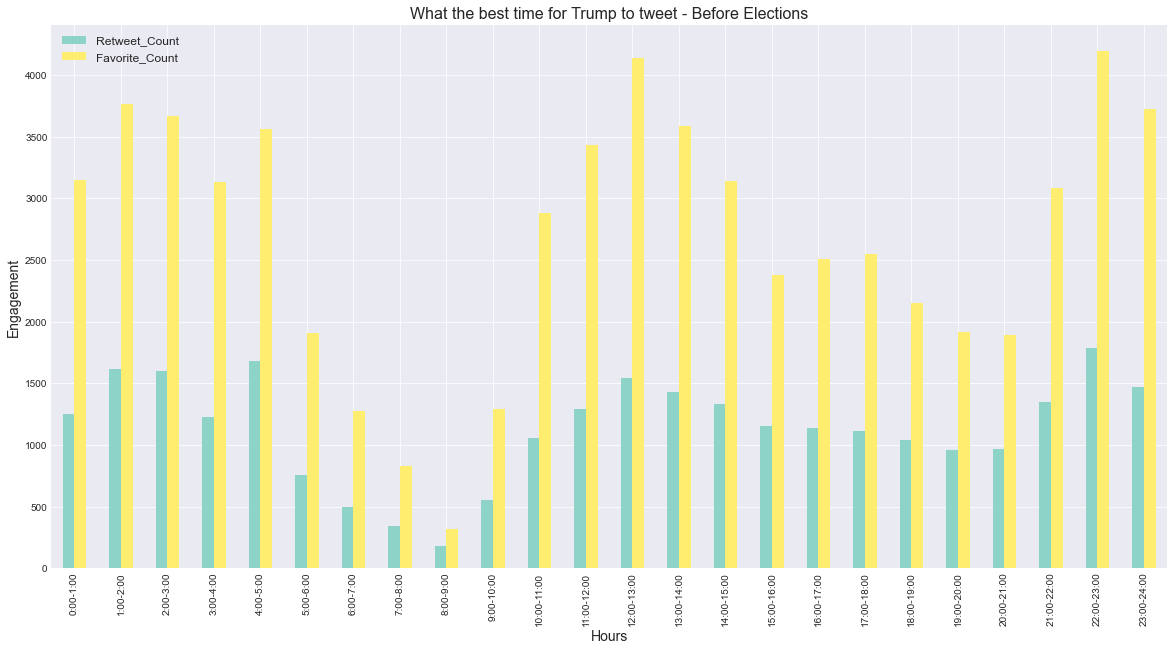

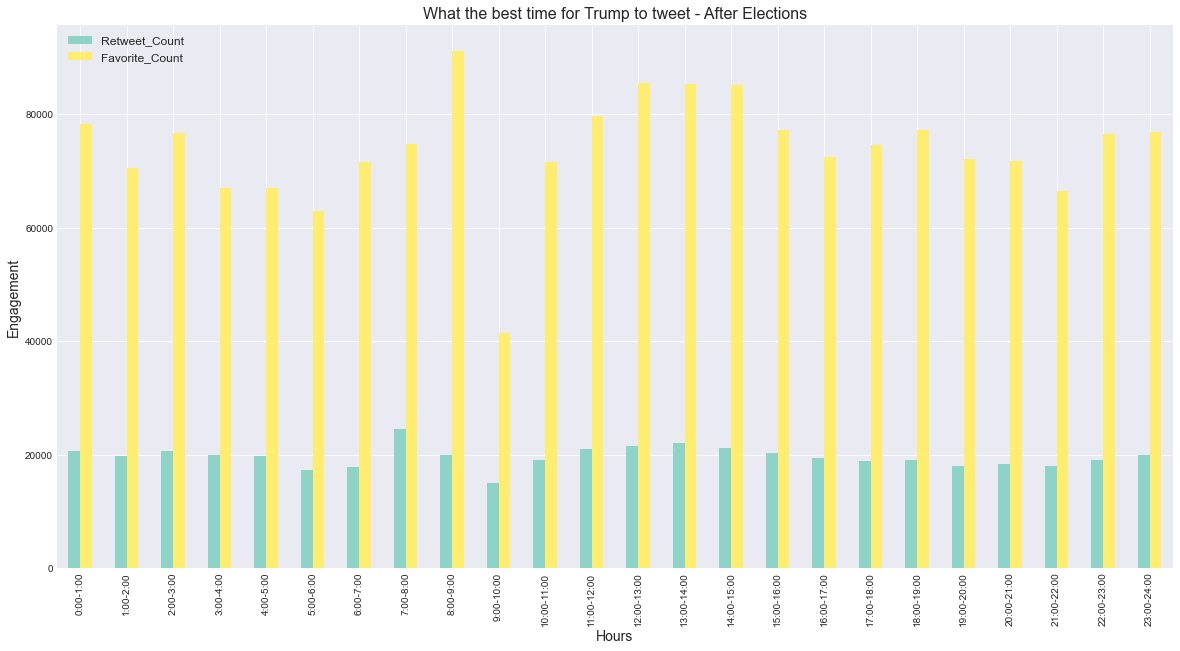

In [13]:
hour_range_unique= bubble_sort(df[mask]['Hour_Range'].unique())


df[mask].groupby('Hour_Range')[['Retweet_Count','Favorite_Count']].mean().reindex(hour_range_unique).plot(kind='bar',figsize=(20, 10), colormap='Set3',grid=True)
plt.ylabel("Engagement", fontsize=14)
plt.xlabel('Hours', fontsize=14)
plt.title('What the best time for Trump to tweet - Before Elections', fontsize=16)
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left',fontsize=12)
plt.show()

df[mask1].groupby('Hour_Range')[['Retweet_Count','Favorite_Count']].mean().reindex(hour_range_unique).plot(kind='bar',figsize=(20, 10),grid=True, colormap='Set3')
plt.ylabel("Engagement", fontsize=14)
plt.xlabel('Hours', fontsize=14)
plt.title('What the best time for Trump to tweet - After Elections', fontsize=16)
plt.style.use('seaborn-darkgrid')
plt.legend(loc='upper left',fontsize=12)
plt.show()

*The bar charts show that before Trump was elected the best time for him to tweet was 22:00-23:00, and after the elections, it was 08:00-09:00. After elections, it didn't matter so much as before elections, his tweets were less retweeted/favorited in general, and got almost the same amount of that engagement every hour of the day.*

### 4 - Tweets per hour

creating a new column, 'Hour', that takes from the original column 'Created_at' only the round hour data using dt method

In [14]:
df['Hour']=df['Created_At'].dt.hour

counting each value there is in 'Hour' column, creating bar charts for before and after elections, and setting charts features.


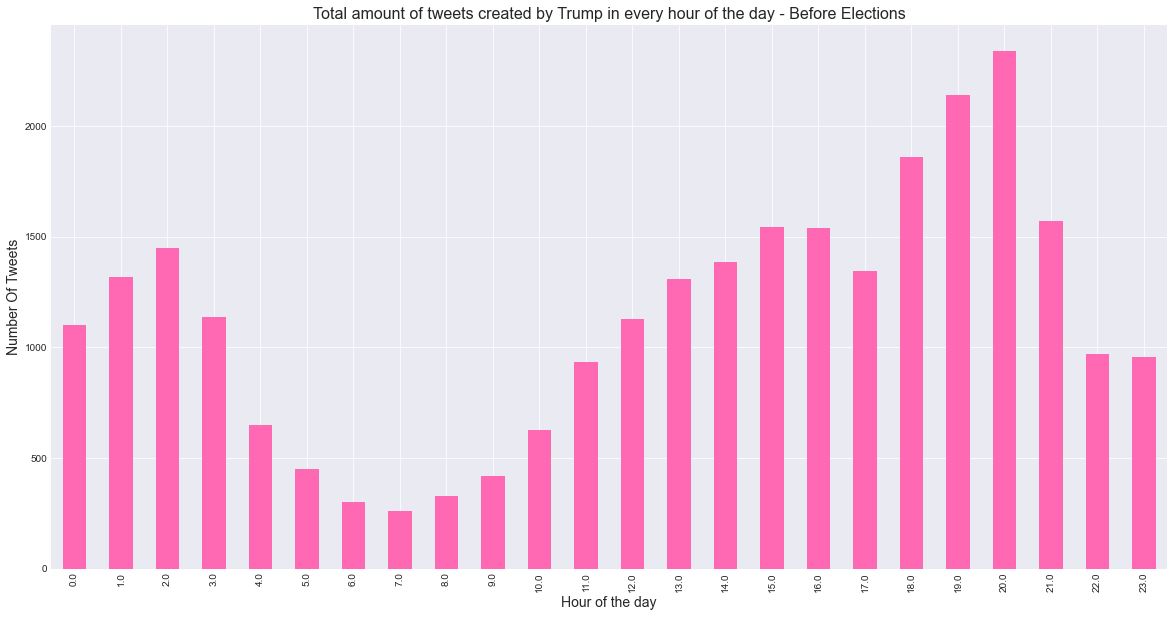

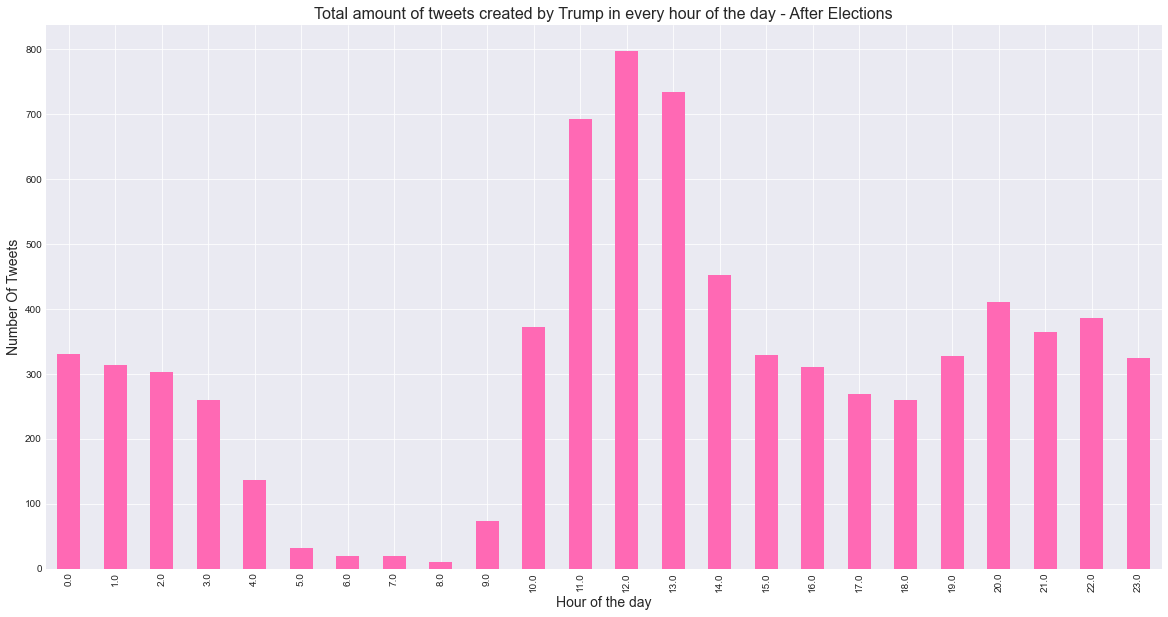

In [15]:
df[mask]['Hour'].value_counts().sort_index().plot(kind='bar',figsize=(20, 10), color='hotpink',grid=True)
plt.xlabel("Hour of the day", fontsize=14)
plt.ylabel("Number Of Tweets", fontsize=14)
plt.title('Total amount of tweets created by Trump in every hour of the day - Before Elections', fontsize=16)
plt.style.use('seaborn-darkgrid')
plt.show()

df[mask1]['Hour'].value_counts().sort_index().plot(kind='bar',figsize=(20, 10), color='hotpink',grid=True)
plt.xlabel("Hour of the day", fontsize=14)
plt.ylabel("Number Of Tweets", fontsize=14)
plt.title('Total amount of tweets created by Trump in every hour of the day - After Elections', fontsize=16)
plt.style.use('seaborn-darkgrid')
plt.show()

*The bar charts show that before the elections Trump tweeted more.
We cannot say for sure when Trump sleeps because he tweets every hour even if it's one tweet (probably because there are people who are tweeted for him), I can assume that in the hours he is less active- he sleeps, it's 6 hours a day before elections, and 5 hours a day after elections.*

### 5 - Best tweet length


writing function that takes a tweet, calculates its length, and returns a verbal length description depending on the length  ("Very short", "Short", "Medium", "Long" or "Very long")

In [16]:
def what_lenght(tweet):
    if len(tweet)<70:
        return "Very Short"
    elif len(tweet)>=70 and len(tweet)<110:
        return "Short"
    elif len(tweet)>=110 and len(tweet)<130:
        return "Medium"
    elif len(tweet)>=130 and len(tweet)<140:
        return "Long"
    elif len(tweet)>=140:
        return "Very Long"

applying the function on the 'Text' column, while creating the 'Tweet Lenght' column that accepts all the values the function returns

In [17]:
df['Tweet_Lenght']= df['Text'].apply(what_lenght)

grouping the values by 'Tweet Lenght', counting mean values of 'Retweet_Count', 'Favorite_Count', and Using 'reindex' to sort the bars. creating bar charts for before and after elections, setting chart features.

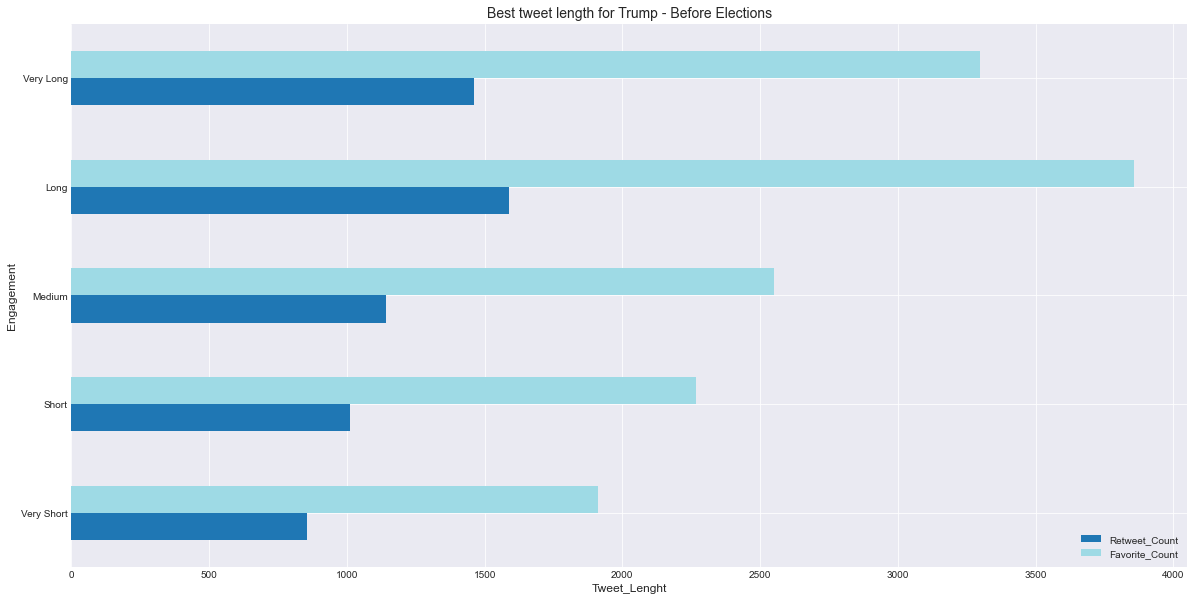

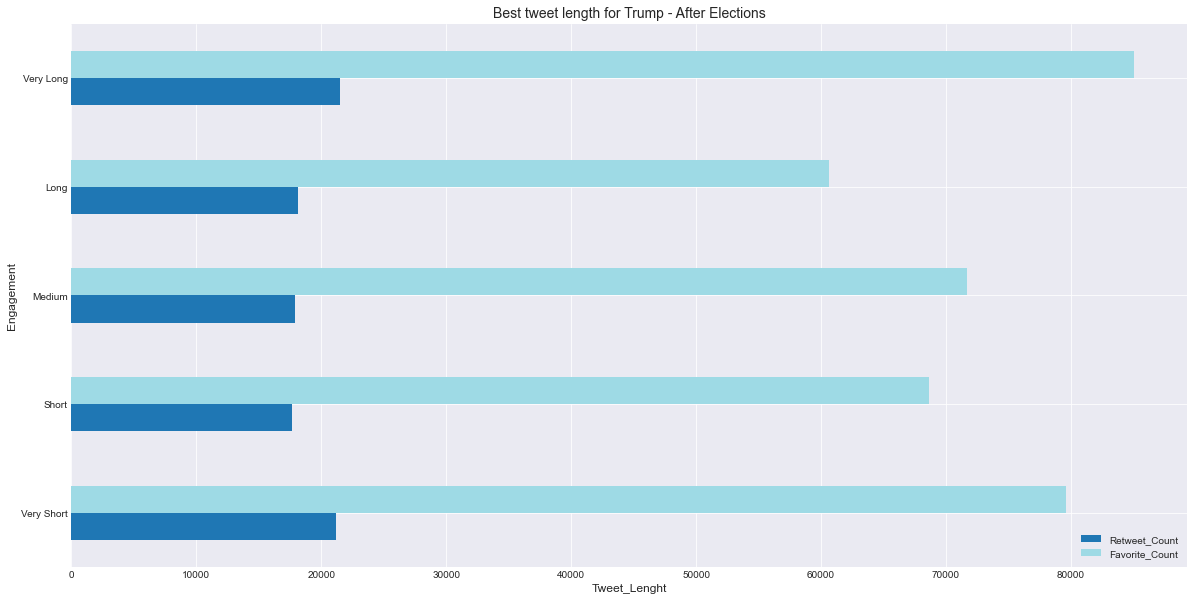

In [18]:
df[mask].groupby('Tweet_Lenght')[['Retweet_Count','Favorite_Count']].mean().reindex(["Very Short", "Short", "Medium", "Long" , "Very Long"]).plot(kind='barh',figsize=(20, 10), colormap='tab20')
plt.xlabel('Tweet_Lenght',fontsize=12)
plt.ylabel('Engagement',fontsize=12)
plt.title('Best tweet length for Trump - Before Elections', fontsize=14)
plt.style.use('seaborn-darkgrid')
plt.legend(loc='lower right')
plt.show()

df[mask1].groupby('Tweet_Lenght')[['Retweet_Count','Favorite_Count']].mean().reindex(["Very Short", "Short", "Medium", "Long" , "Very Long"]).plot(kind='barh',figsize=(20, 10), colormap='tab20')
plt.xlabel('Tweet_Lenght',fontsize=12)
plt.ylabel('Engagement',fontsize=12)
plt.title('Best tweet length for Trump - After Elections', fontsize=14)
plt.style.use('seaborn-darkgrid')
plt.legend(loc='lower right')
plt.show()

*The horizontal bar charts show that the best length for Trump's tweets before the elections is 'Long' (between 130 to 140 letters) and after the elections 'Very Long' (over 140 letters).*

### 6 - Tweet length distribution

creating two arrays, 'before' and 'after' (that represent before and after the elections), that count the values of 'Tweet Lenght' of mask and mask1 using 'tolist()'.

creating two variables 'before_counter' and 'after_counter' with the value '-1', to use them in the functions'before_helper_func' and 'after_helper_func' for index.
in the functions using 'global' in order to use the variables and change them, adding +1 to the counters, and returning the values that are in the before/after list in some index.

counting values in the 'Tweet Lenght' column, creating plots for before and after elections. calling the function I've created to "autopct" in order to show in the pie chart the actual values of the total amount of tweets in each length category. setting plots features

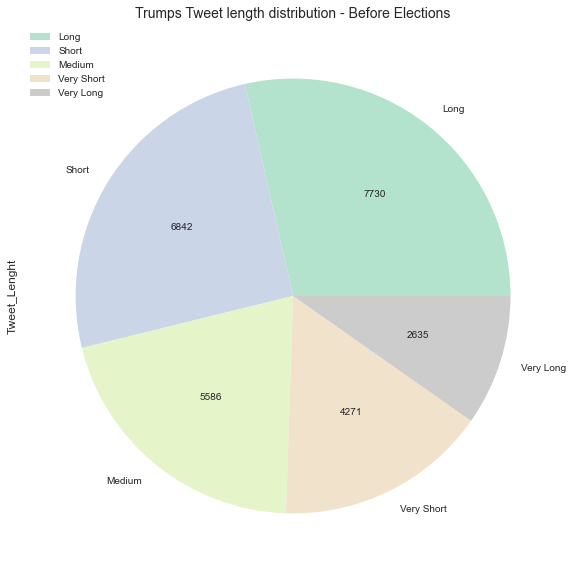

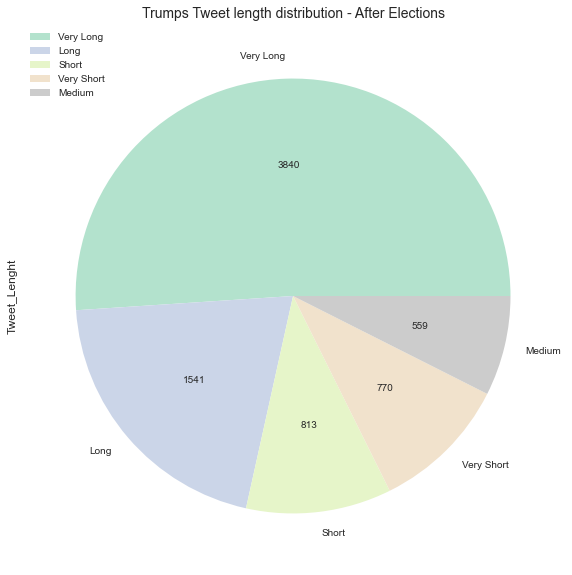

In [19]:
before = df[mask]['Tweet_Lenght'].value_counts(dropna=False).tolist()
after = df[mask1]['Tweet_Lenght'].value_counts(dropna=False).tolist()

before_counter = -1
after_counter = -1

def before_helper_func(val):
    global before_counter   
    before_counter+=1
    return before[before_counter]

def after_helper_func(val):
    global after_counter   
    after_counter+=1
    return after[after_counter]

df[mask]['Tweet_Lenght'].value_counts().plot(kind='pie',figsize=(10, 10), colormap='Pastel2',autopct=before_helper_func)
plt.ylabel('Tweet_Lenght',fontsize=12)
plt.title('Trump'"s Tweet length distribution - Before Elections", fontsize=14)
plt.legend(loc='upper left')
plt.show()

df[mask1]['Tweet_Lenght'].value_counts().plot(kind='pie',figsize=(10, 10), colormap='Pastel2',autopct=after_helper_func)
plt.ylabel('Tweet_Lenght',fontsize=12)
plt.title('Trump'"s Tweet length distribution - After Elections", fontsize=14)
plt.legend(loc='upper left')
plt.show()


*The pie charts show that before the election the success ratio of all lengths was spread almost equally, and after the elections, the relative differences between the successful length and the other lengths increased significantly.*

### 7 - Android vs iPhone

creating two new columns 'iPhone' and 'Android' that take data from the column 'Source' and return boolean values according to if they iPhone or Android

In [20]:
df["iPhone"]= df['Source']=="Twitter for iPhone"
df["Android"]=df['Source']=="Twitter for Android"

creating a new column named 'Date' that takes values from 'Created_At', using dt method to cast the underlying data of this  series to Index at weekly frequency, and in the end, returning the new values to 'Date' 

In [21]:
df['Date']=df['Created_At'].dt.to_period("W")

creating a bar chart of two lines, that shows Trump's usage of each platform over the time per day.  setting chart's features.

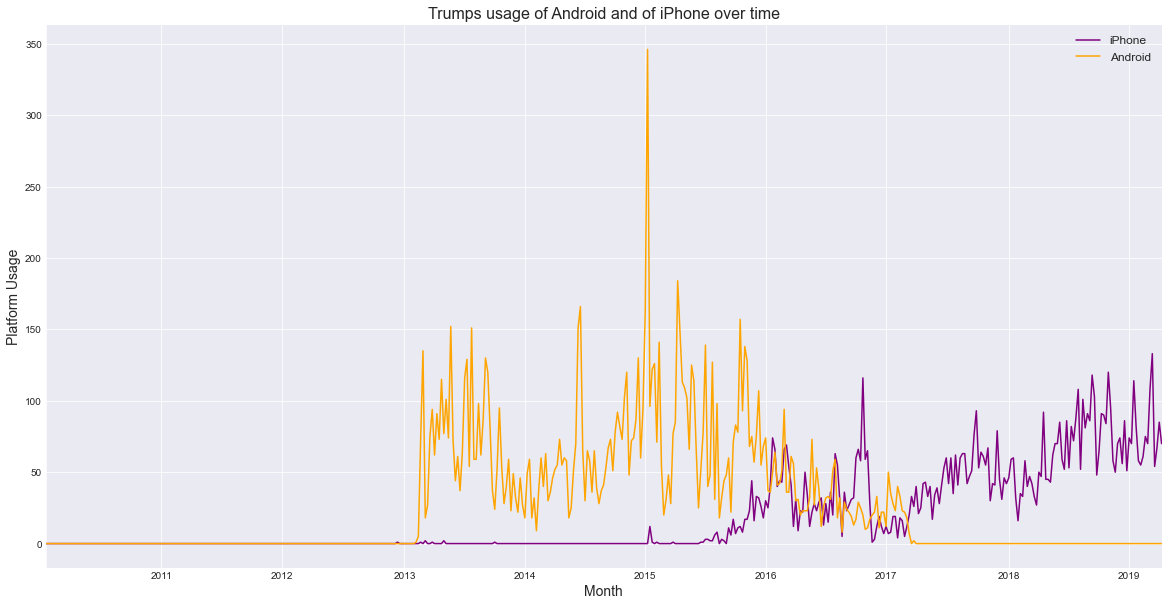

In [22]:
df.groupby('Date')[['iPhone','Android']].sum().plot(figsize=(20,10),color=('purple','orange'))
plt.ylabel('Platform Usage',fontsize=14)
plt.xlabel('Month', fontsize=14)
plt.title('Trump'"s usage of Android and of iPhone over time",fontsize=16)
plt.style.use('seaborn-darkgrid')
plt.legend(fontsize=12)
plt.show()

*The line chart shows that around 2015 Trump started to actively use iPhone to tweet, and gradually stopped using Android to tweet until 2017. When Trump transformed iPhone he used it less than he used to use Android.*

### 8 - Market influence

loading the relevant CSV file

In [23]:
df1 = pd.read_csv('./SPY.csv',parse_dates=['Date'])

changing the 'Date' column of the second data frame by using again dt period method, and merging the two dataframes I used on this task, with a common 'Date' column

In [24]:
df1['Date']=df1['Date'].dt.to_period("W")
df3=df.merge(df1, left_on='Date', right_on='Date')



creating a chart with two lines, using the 'Date', 'Adj Close', and 'Retweet_Count' columns from the merged dataframe, in order to compare them, using two y-axes because they are in different measures.
setting plot features.

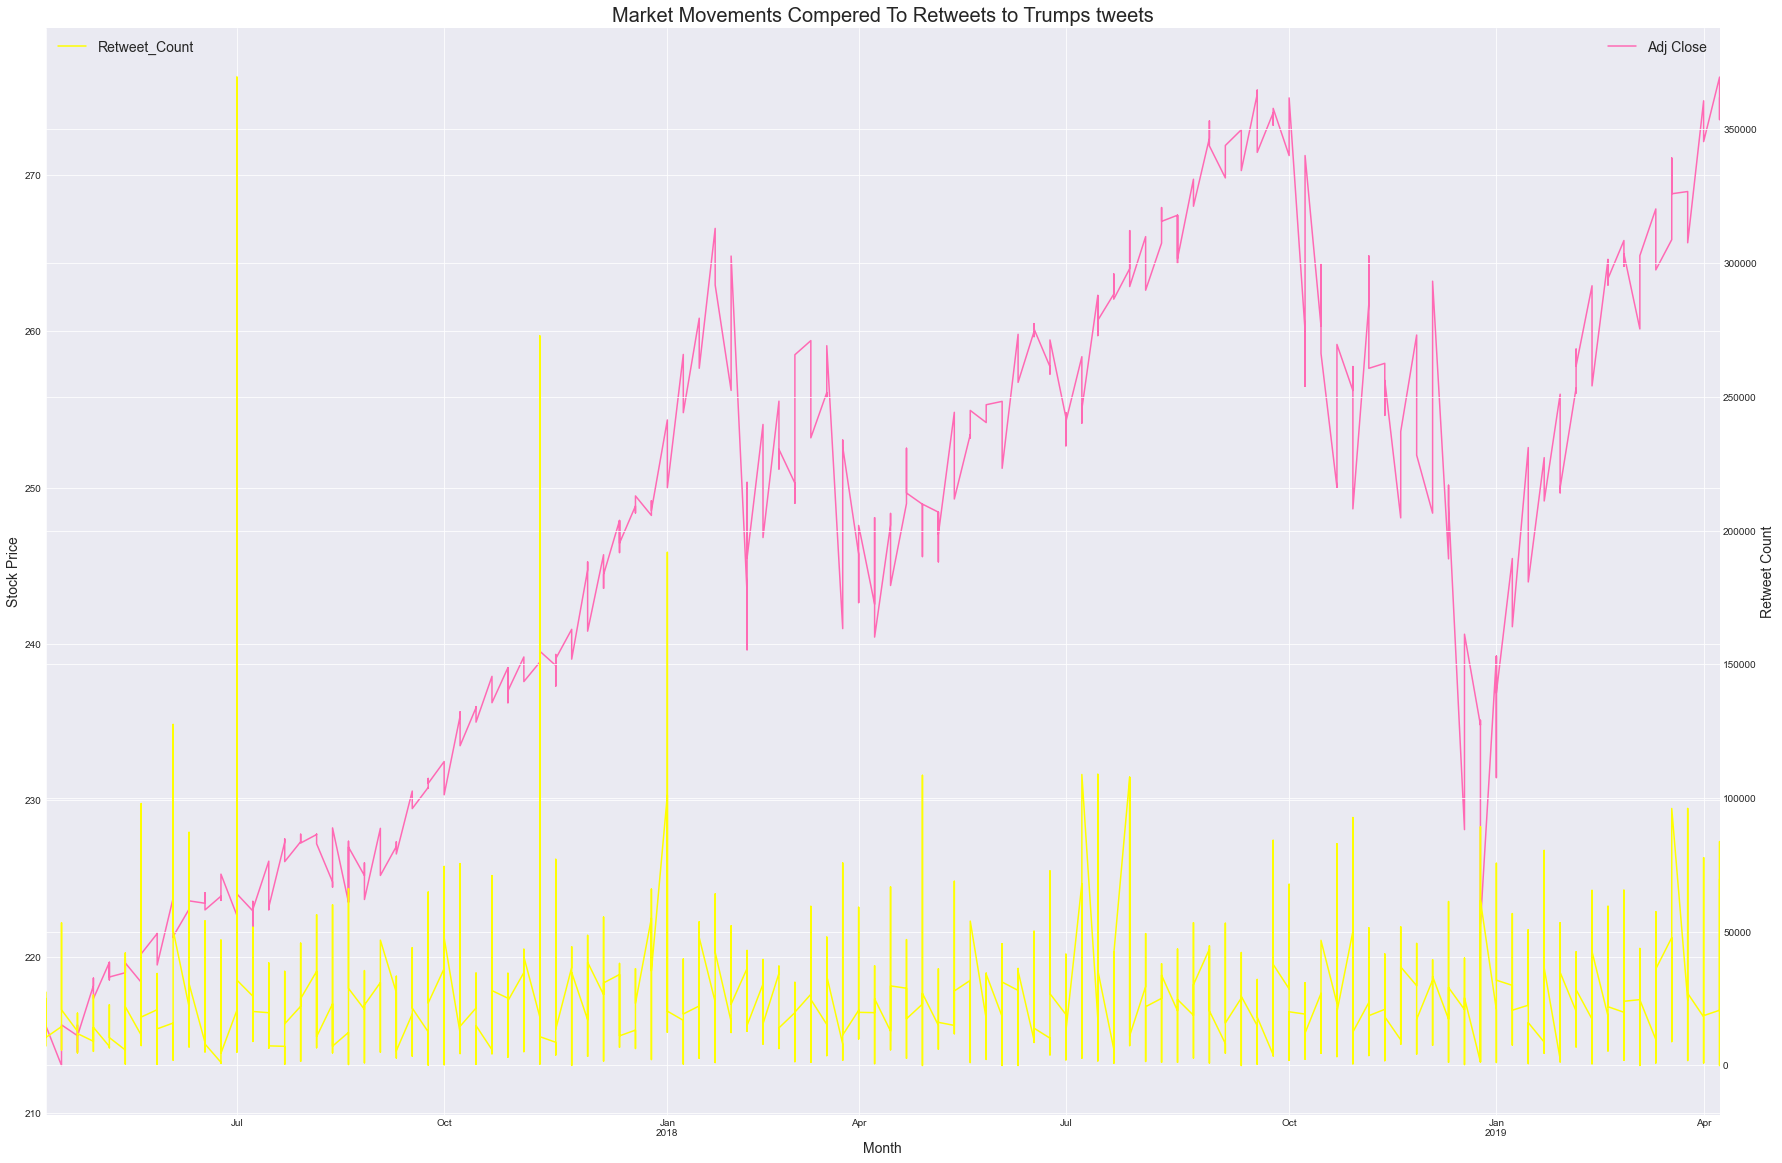

In [25]:
ax = df3.plot('Date','Adj Close', color='hotpink')
ax1 = ax.twinx()
df3.plot('Date','Retweet_Count',ax=ax1, color='yellow',figsize=(30,20))
ax.set_ylabel('Stock Price',fontsize=14)
ax1.set_ylabel('Retweet Count',fontsize=14)
ax.set_xlabel('Month',fontsize=14)
plt.title('Market Movements Compered To Retweets to Trumps tweets',fontsize=20)
ax.legend(fontsize=14,loc='upper right')
ax1.legend(fontsize=14,loc='upper left')
plt.style.use('seaborn-darkgrid')
plt.show()

*The chart shows that on days that the market went up or down there is some correlation to the retweets of trump tweets, but it's not always fit and not on the same relative scales.*